# Imagerie médicale

Rq: l'idée est d'utiliser une image IRM de faire une segmentation des tissus cérébraux
1. on commence par rendre l'image en niveau de gris
2. puis on affiche l'histogramme de l'image
3. On se fixe 3 classes pour la segmentation: matiere blanche matiere grise et liquide csf,
4. On observe sur l'histogramme le fond en noir et le reste de l'image en niveau de gris
5. avec des seuils de l'histogramme 15, 70, 150 on fait un seuillage pour retrouver les 3 tissus
6. On calcule le ration mb/(mg+mb+csf), mg/(mg+mb+csf),csf/(mg+mb+csf) pour un controle de dégénéressance cérébrale dans le temps ou d'autre maladie

RQ: je voulais ajouter une petite partie ou on applique un masque binaire pour enlecer le crane mais je ne suis pas arrivée é avoir ce masque ( à discuter)
https://tenor.com/view/mri-brain-scan-gif-9565732

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread

## Importer une image

Affichez les fichiers que se trouvent dans le dossier actuel

In [12]:
ls

brain.jpeg          mask.png            tumor.png
brain2.jpg          mri_exercice.ipynb


Nous voyons plusiers fichiers en forme image avec les extensions
- `.png`
- `.jpg`

Maintenant nous pouvons importer les images dans une matrice 

In [20]:
brain = imread('brain.jpeg')

La variable `brain` (*cerveau* en anglais) contient une matrice de l'image.  
Regardons sa dimension.

In [10]:
brain.shape

(202, 165, 3)

**Exercice**  
Créez une variable `tumor` et une variable `brain2` et importez les images correspondantes. Affichez leurs dimensions.

## Afficher une image
Affichons maintenant l'image.

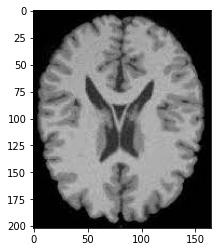

In [11]:
plt.imshow(brain);

**Exercice**  
Affichez les matrices `tumor` et `brain2` comme images.

## Coder l'image en niveaux de gris
Dans ces images les couleurs ne sont pas utiles, elle est pourtant codée en mode couleurs.
Vérifions que cette image est codé en mode couleurs.

Au lieu de prendre 3 canaux, on va prendre un seul.

In [21]:
brain = brain[:,:,0]

Affichons sa nouvelle dimension

In [23]:
brain.shape

(202, 165)

Affichons de nouveau cette image noir et blanc

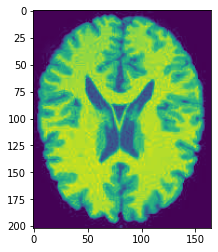

In [24]:
plt.imshow(brain);

## Colormap

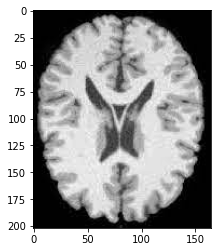

In [27]:
plt.imshow(brain, cmap='gray');

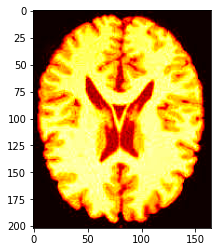

In [29]:
plt.imshow(brain, cmap='hot');

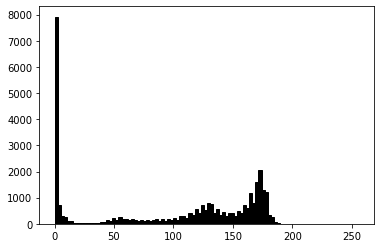

In [30]:
plt.hist(brain.ravel(), bins=100, range=(0.0, 256), fc='k', ec='k');

In [ ]:
gm (gray matter)
wm (white matter)

In [33]:
gm = brain.copy() * 0
wm = brain.copy() * 0 
csf = brain.copy() * 0

for i in range(brain.shape[0]):
    for j in range(brain.shape[1]):
        if 15 <= brain[i,j] < 70:
            csf[i,j] = 1
        elif 70 <= brain[i,j] < 150:
            gm[i,j]  = 1

        elif 150 <= brain[i,j] <= 255:
            wm [i,j] = 1


print(i,j)  
#plt.imshow(mask1,cmap = plt.get_cmap('gray'))
#max(np.ravel(gray1))

201 164


In [34]:
gm = gm * 3
wm = wm * 2
all = gm+csf+wm
max(np.ravel(all))

3

## Afficher

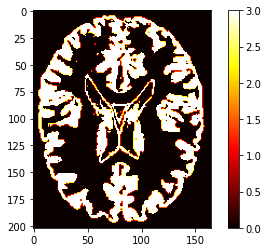

In [40]:
plt.imshow(gm, cmap='hot');
plt.colorbar()

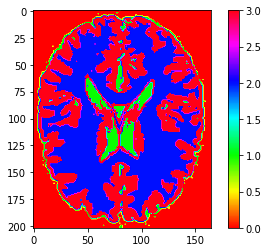

In [35]:
plt.imshow(all, cmap='hsv');
plt.colorbar();

In [42]:
np.unique(wm)

array([0, 2], dtype=uint8)